In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Instagram data.csv",encoding='latin-1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [4]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [5]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

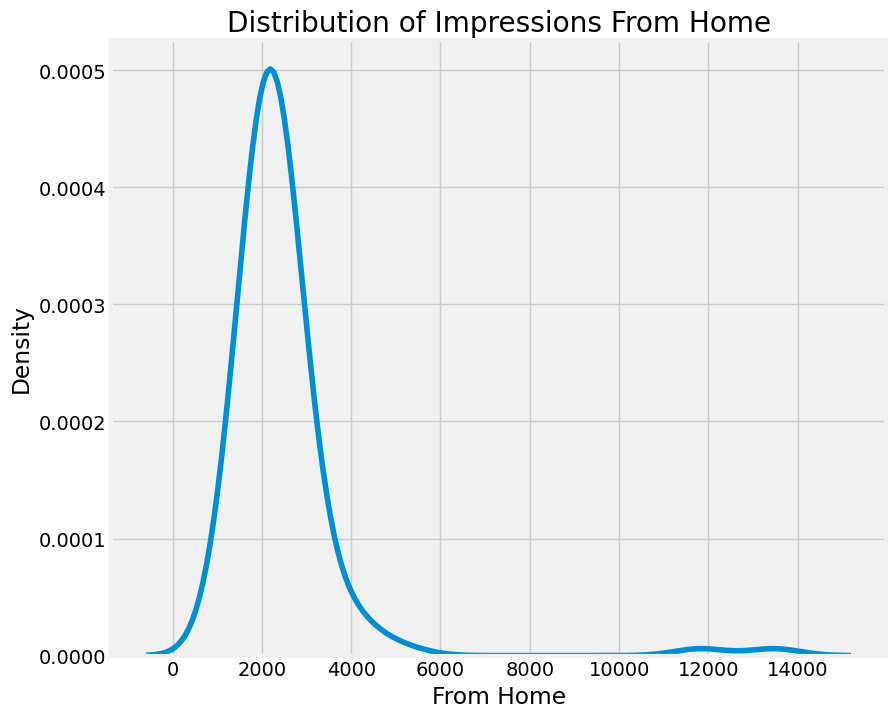

In [7]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.kdeplot(df['From Home'])
plt.show()

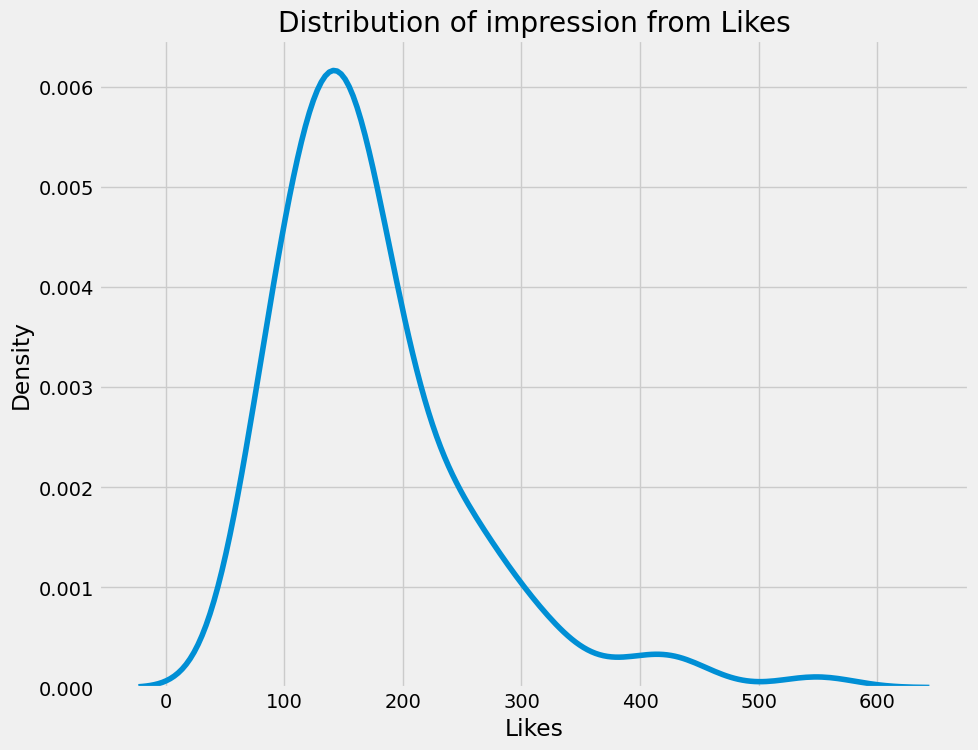

In [8]:
plt.figure(figsize=(10,8))
plt.title("Distribution of impression from Likes")
sns.kdeplot(df['Likes'])
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['Likes'] = scaler.fit_transform(df[['Likes']])


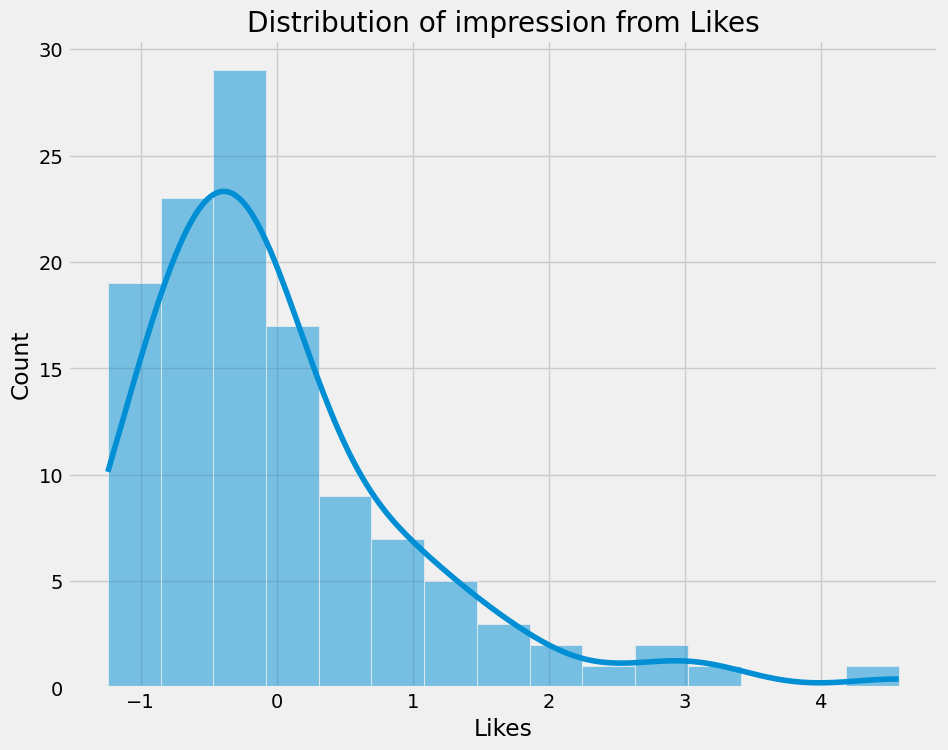

In [10]:
plt.figure(figsize=(10,8))
plt.title("Distribution of impression from Likes")
sns.histplot(df['Likes'],kde=True)
plt.show()

In [11]:
Q1 = df['Likes'].quantile(0.25)
Q3 = df['Likes'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df['Likes'] = df['Likes'][(df['Likes'] >= lower_bound) & (df['Likes'] <= upper_bound)]
print(df['Likes'])

0     -0.143621
1      0.612181
2     -0.521522
3      0.478087
4     -0.619045
         ...   
114         NaN
115   -0.314286
116   -0.996945
117         NaN
118         NaN
Name: Likes, Length: 119, dtype: float64


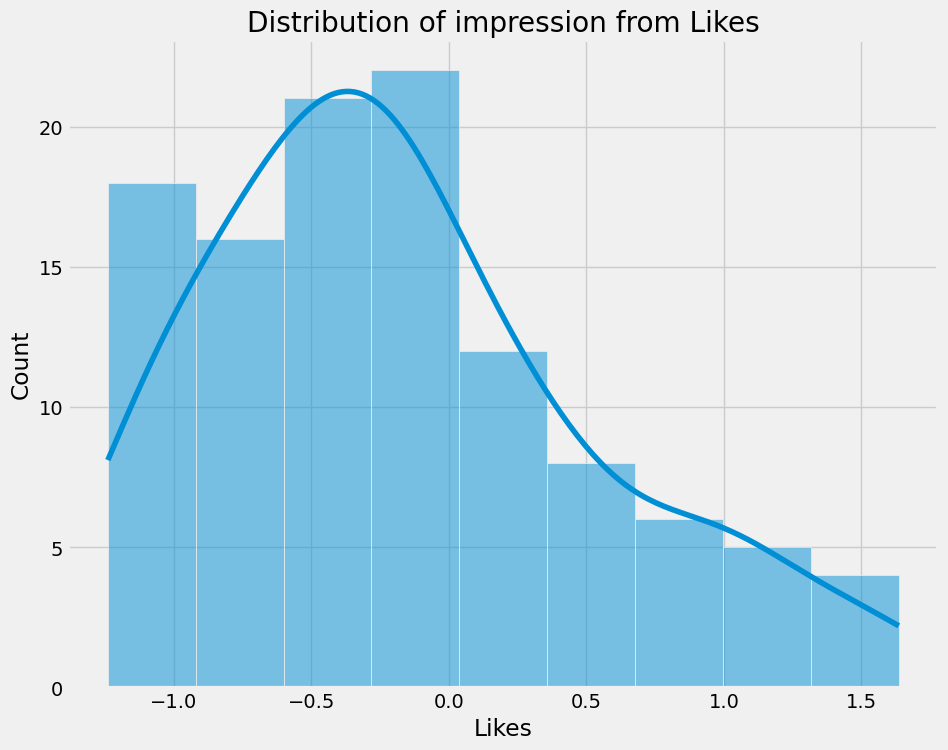

In [12]:
plt.figure(figsize=(10,8))
plt.title("Distribution of impression from Likes")
sns.histplot(df['Likes'],kde=True)
plt.show()

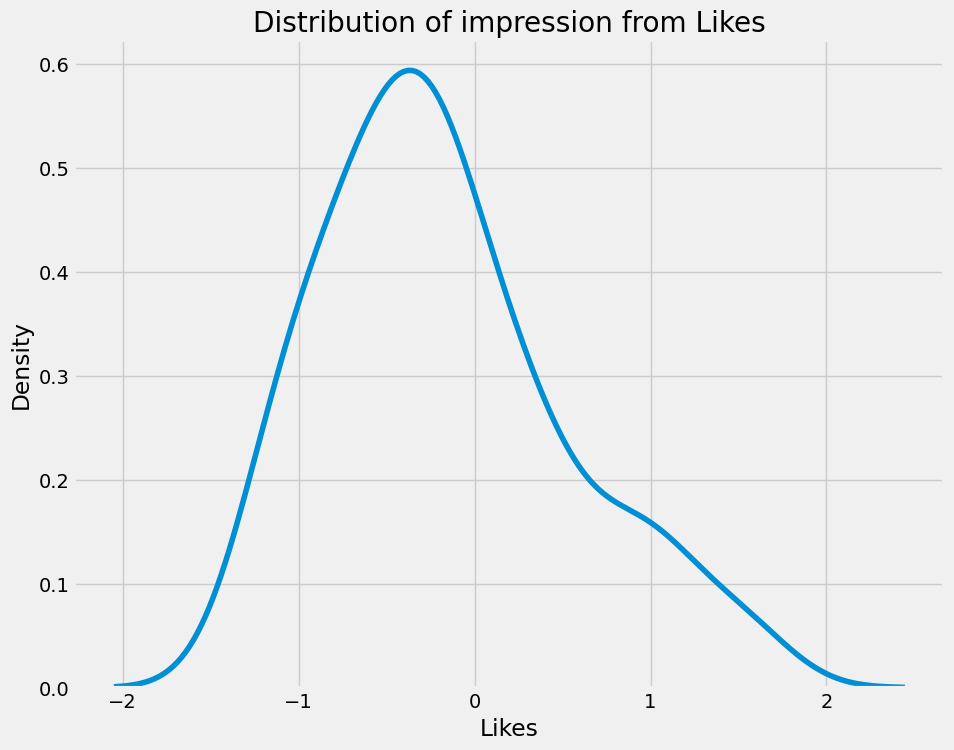

In [13]:
plt.figure(figsize=(10,8))
plt.title("Distribution of impression from Likes")
sns.kdeplot(df['Likes'])
plt.show()

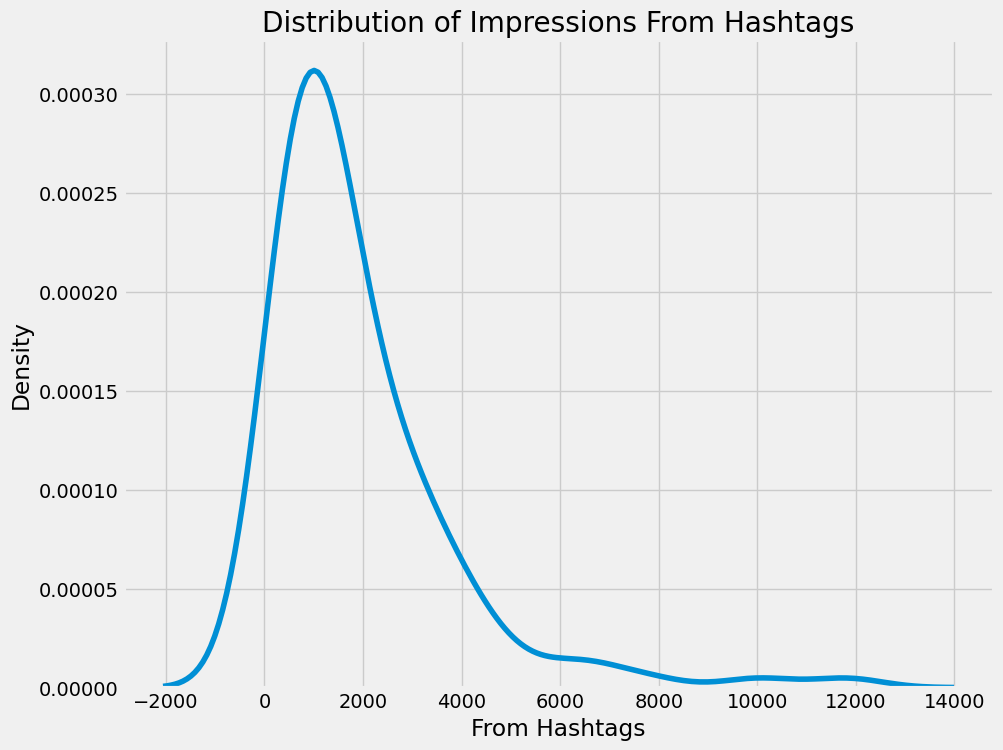

In [14]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.kdeplot(df['From Hashtags'])
plt.show()

In [15]:
# Now lets look at the percentage of impressions I get from various sources
import plotly.io as pio
# Calculate sums directly in the list comprehension
labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
values = [df[col].sum() for col in labels]

# Create the pie chart
fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
pio.show(fig)


In [16]:
#pip install --upgrade nbformat


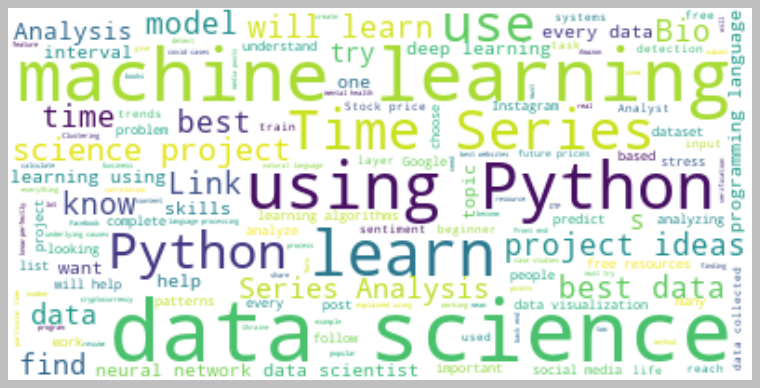

In [17]:
#lets analyse the content for that i have two columns captions and hashtags 
#lets create a wordcloud of the caption columns to look at the most used word in the caption of my insta post
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#!pip install wordcloud


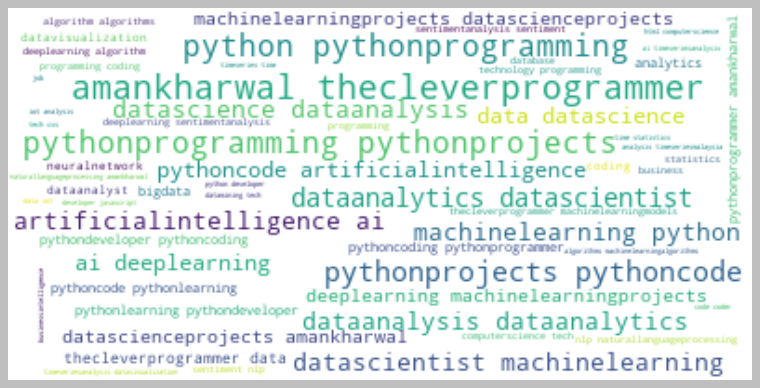

In [19]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

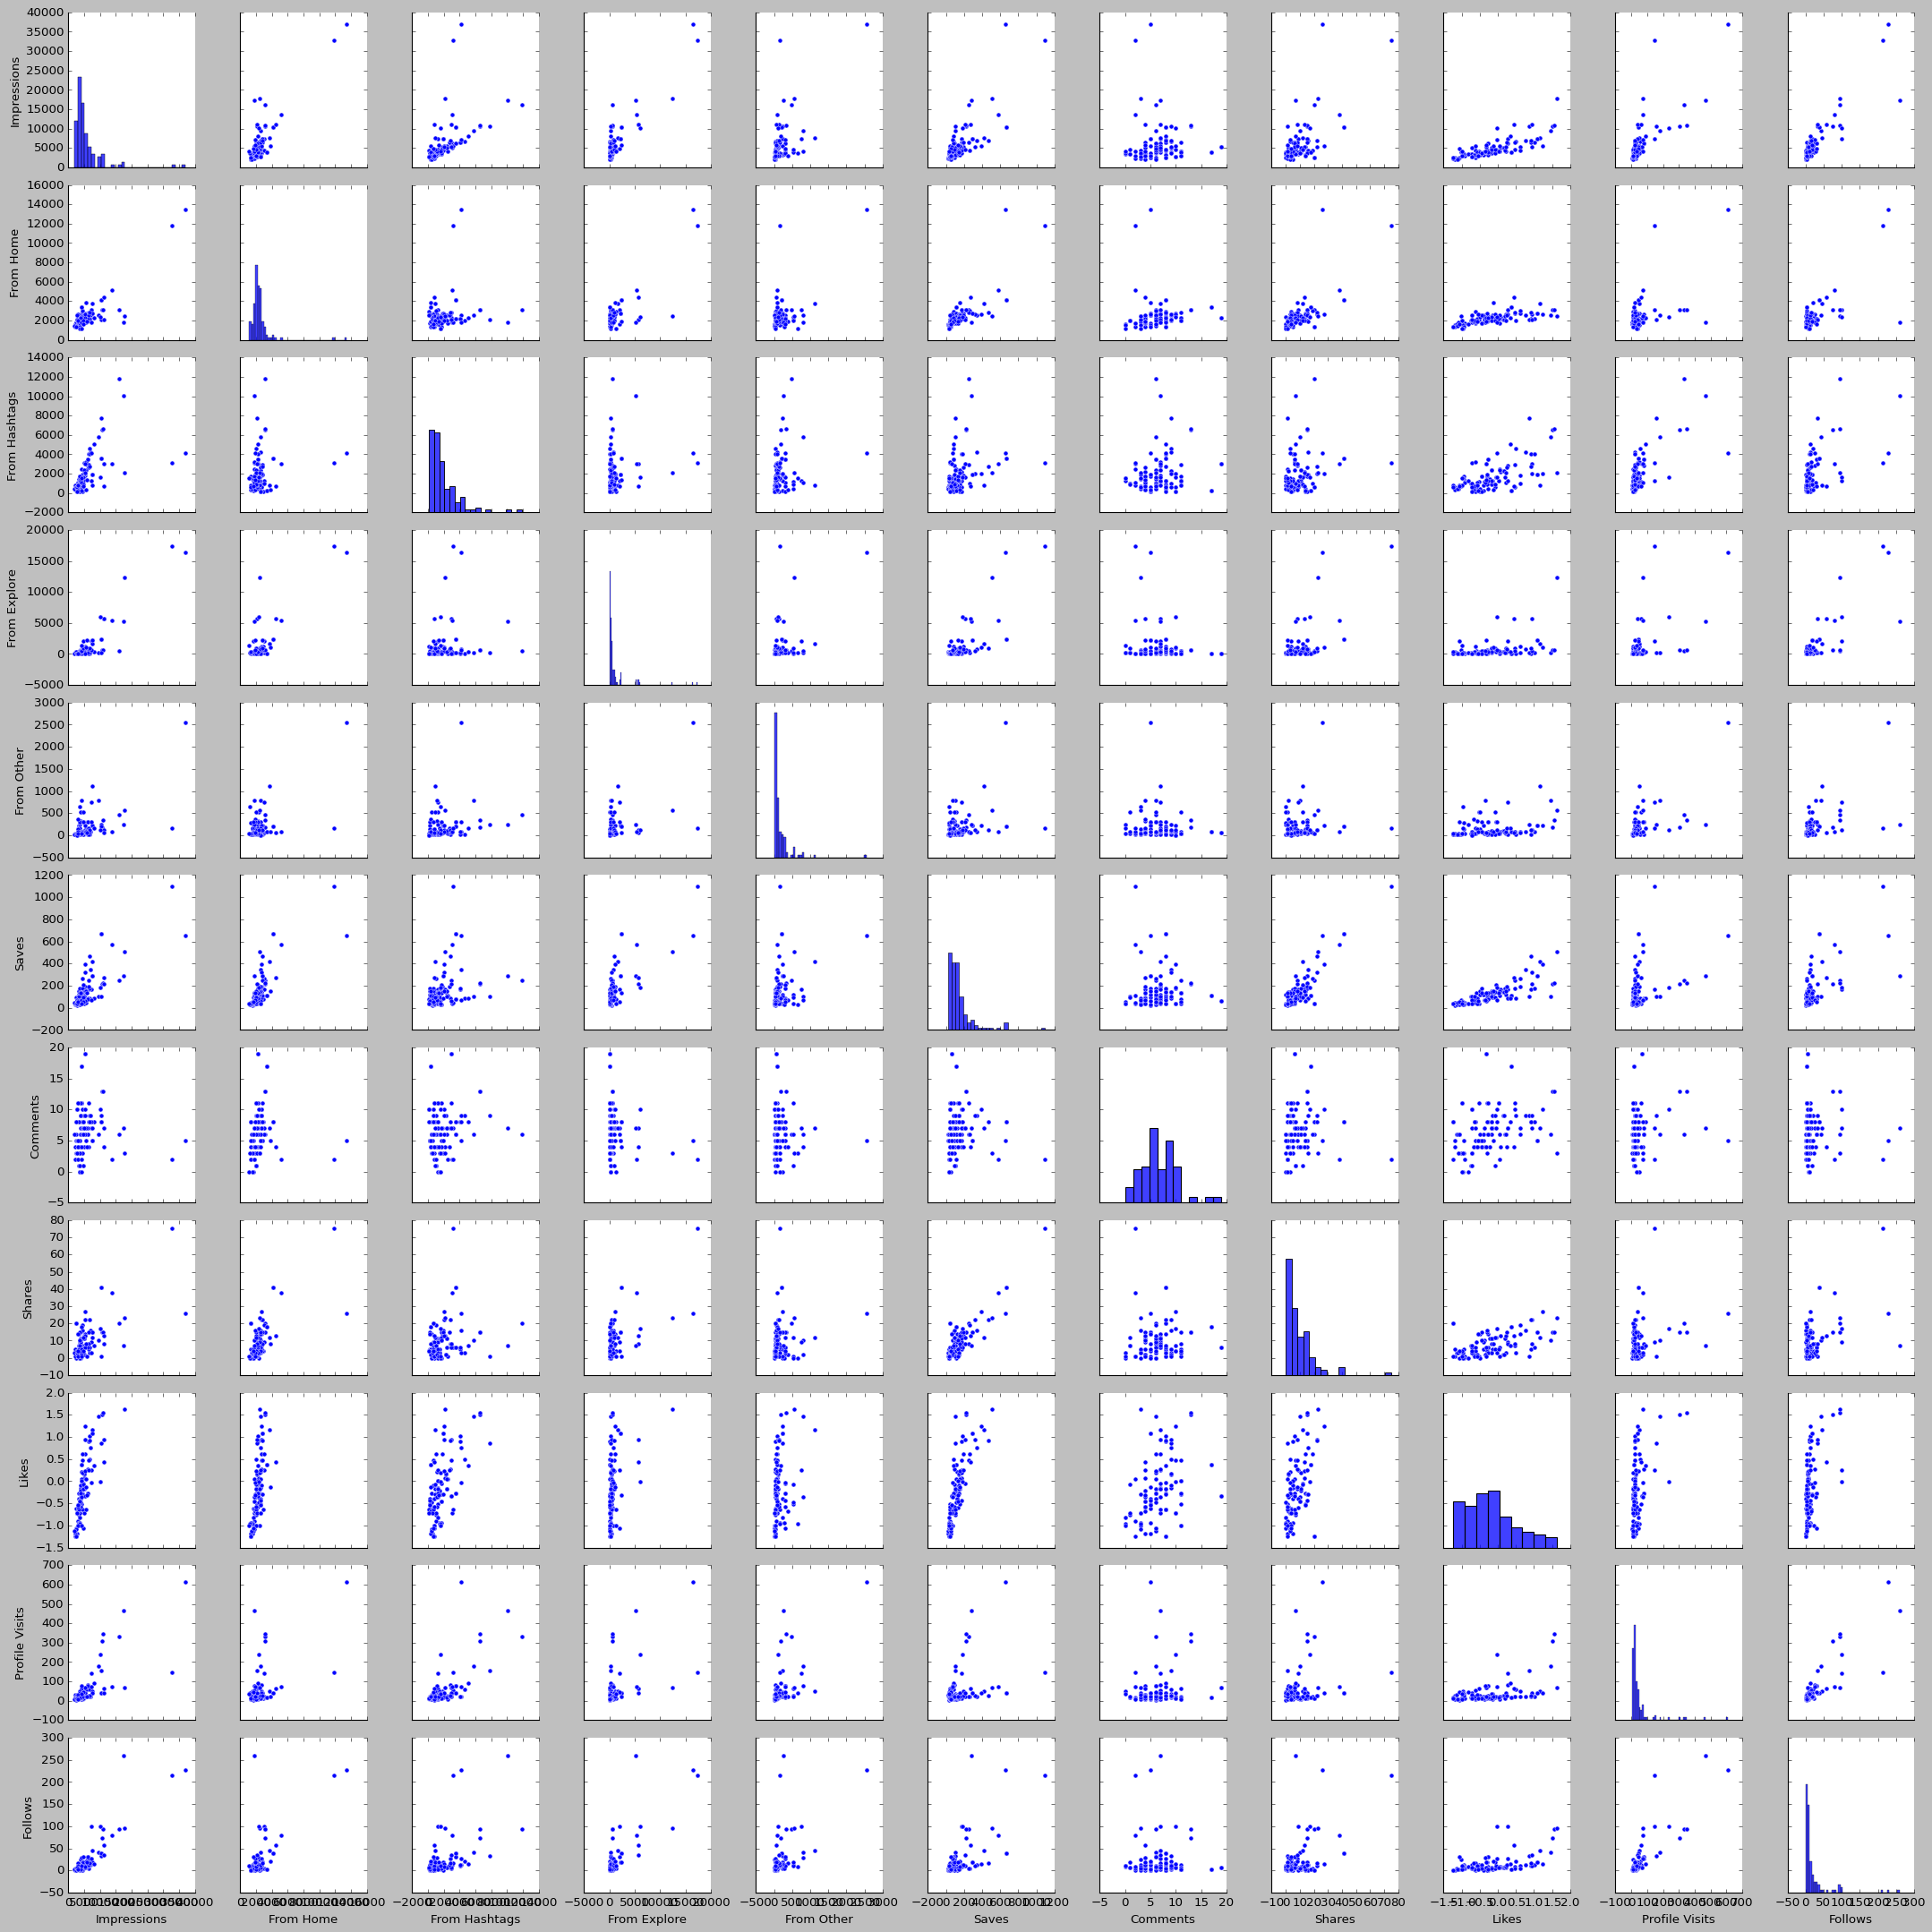

In [20]:
sns.pairplot(df)

In [21]:
df.drop(columns=["Caption","Hashtags"],inplace=True)

In [22]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:-1]
y = df.iloc[:,0]

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X.head()

,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits
0,2586,1028,619,56,98,9,5,-0.143621,35
1,2727,1838,1174,78,194,7,14,0.612181,48
2,2085,1188,0,533,41,11,1,-0.521522,62
3,2700,621,932,73,172,10,7,0.478087,23
4,1704,255,279,37,96,5,4,-0.619045,8


In [24]:
y.head()

0    3920
1    5394
2    4021
3    4528
4    2518
Name: Impressions, dtype: int64

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)


0.867044712510031

In [28]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows','From Hashtags','From Explore',"From Other"]]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0,345,423,657]])
rfr.predict(features)

C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([12912.16])